In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
import keras
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/data/Prepared/ciciot2023-reduced.csv')

In [ ]:
data.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,...,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06
mean,2.797806e+01,6.447324e+05,9.727536e+00,9.466363e+01,4.495814e+03,4.495814e+03,5.210983e-07,3.395979e-02,9.441610e-02,3.643877e-02,...,4.423327e+02,3.040127e+02,4.427145e+02,8.332583e+07,9.500390e+00,2.427685e+01,4.294849e+02,3.877413e+05,5.527144e-01,1.415569e+02
std,2.789426e+02,1.169586e+06,9.151269e+00,4.666282e+01,6.180899e+04,6.180899e+04,1.261112e-04,1.811258e-01,2.924069e-01,1.873793e-01,...,5.816266e+02,5.014538e+02,5.859603e+02,6.461473e+07,3.104848e+00,1.660295e+01,7.096259e+02,1.380319e+06,4.397034e-01,7.996218e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.559465e-02,8.400000e+01,6.000000e+00,6.400000e+01,9.840240e+00,9.840240e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.401677e+01,0.000000e+00,5.406000e+01,1.659933e-02,5.500000e+00,1.039357e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.850000e+01
50%,5.749314e+00,5.308980e+04,6.000000e+00,6.591000e+01,3.974216e+01,3.974216e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.274585e+02,4.738432e+01,1.176000e+02,8.315033e+07,9.500000e+00,1.578336e+01,6.645081e+01,3.226114e+03,8.000000e-01,1.415500e+02
75%,3.338861e+01,8.073643e+05,9.300000e+00,1.133000e+02,8.183739e+01,8.183739e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.920000e+02,5.236078e+02,5.920000e+02,1.665181e+08,1.350000e+01,3.437831e+01,7.394102e+02,3.204772e+05,1.000000e+00,2.446000e+02
max,7.472130e+04,9.825656e+06,4.700000e+01,2.550000e+02,7.340032e+06,7.340032e+06,5.928655e-02,1.000000e+00,1.000000e+00,1.000000e+00,...,1.160047e+04,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.453904e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177098 entries, 0 to 1177097
Data columns (total 48 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1177098 non-null  int64  
 1   flow_duration    1177098 non-null  float64
 2   Header_Length    1177098 non-null  float64
 3   Protocol Type    1177098 non-null  float64
 4   Duration         1177098 non-null  float64
 5   Rate             1177098 non-null  float64
 6   Srate            1177098 non-null  float64
 7   Drate            1177098 non-null  float64
 8   fin_flag_number  1177098 non-null  float64
 9   syn_flag_number  1177098 non-null  float64
 10  rst_flag_number  1177098 non-null  float64
 11  psh_flag_number  1177098 non-null  float64
 12  ack_flag_number  1177098 non-null  float64
 13  ece_flag_number  1177098 non-null  float64
 14  cwr_flag_number  1177098 non-null  float64
 15  ack_count        1177098 non-null  float64
 16  syn_count        1

In [ ]:
data.drop(columns='Unnamed: 0', inplace=True)
data

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,30.337559,30.337559,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,0.0,1.0,64.0,0.689640,0.689640,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312898e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
2,0.000000,0.0,1.0,64.0,1.350653,1.350653,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314964e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
3,0.000000,0.0,1.0,64.0,3.637768,3.637768,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312906e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312889e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,21.931409,3877.2,3.1,57.1,35.848699,35.848699,0.0,0.0,0.0,0.0,...,251.519584,147.8,3.352358e-02,5.5,20.309082,355.702407,72476.897264,0.9,38.50,Uploading_Attack
1177094,623.726814,86935.3,5.5,70.4,0.214131,0.214131,0.0,0.0,0.0,0.0,...,437.244141,684.1,1.630549e-02,5.5,22.382339,618.356594,568501.573782,0.9,38.50,Uploading_Attack
1177095,82.325677,7351.8,13.2,71.2,28.355732,28.355732,0.0,0.0,0.0,0.0,...,47.763924,157.1,1.115448e-02,5.5,17.417450,67.548389,2551.505968,0.9,38.50,Uploading_Attack
1177096,45.667144,2508.2,10.4,111.6,129097.868387,129097.868387,0.0,0.0,0.0,0.0,...,45.064730,109.2,4.131398e-02,5.5,14.717295,63.731153,2333.652536,0.9,38.50,Uploading_Attack


In [ ]:
## Checking to see if some of the columns contain all zeros
columns = data.columns

result = np.sum(data[columns])
result[result == 0]

In [ ]:
data.drop(columns=['DHCP', 'SMTP', 'Telnet'], axis=1, inplace=True)

In [ ]:
# Creating a dictionary of attack types for 33 attack classes + 1 for benign traffic
dict_34_classes = {'BenignTraffic': 0 ,
                    'DDoS-RSTFINFlood' :1, 'DDoS-PSHACK_Flood':2,  'DDoS-SYN_Flood':3, 'DDoS-UDP_Flood':4, 'DDoS-TCP_Flood':5,
                    'DDoS-ICMP_Flood':6, 'DDoS-SynonymousIP_Flood':7, 'DDoS-ACK_Fragmentation':8, 'DDoS-UDP_Fragmentation':9, 'DDoS-ICMP_Fragmentation':10,
                    'DDoS-SlowLoris':11, 'DDoS-HTTP_Flood':12, 'DoS-UDP_Flood':13, 'DoS-SYN_Flood':14, 'DoS-TCP_Flood':15, 'DoS-HTTP_Flood':16,                 # DDoS and DoS
                    'Mirai-greeth_flood': 17, 'Mirai-greip_flood': 18, 'Mirai-udpplain': 19,                                                                    # Mirai
                    'Recon-PingSweep': 20, 'Recon-OSScan': 21, 'Recon-PortScan': 22, 'VulnerabilityScan': 23, 'Recon-HostDiscovery': 24,                        # Reconnaissance
                    'DNS_Spoofing': 25, 'MITM-ArpSpoofing': 26,                                                                                                 # Spoofing
                    'BrowserHijacking': 27, 'Backdoor_Malware': 28, 'XSS': 29, 'Uploading_Attack': 30, 'SqlInjection': 31, 'CommandInjection': 32,              # Web
                    'DictionaryBruteForce': 33}                                                                                                                 # Brute Force

dict_7_classes = {  0: 0 ,
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS
                    17: 2, 18: 2, 19: 2,                                                                                                                        # Mirai
                    20: 3, 21: 3, 22: 3, 23: 3, 24: 3,                                                                                                          # Reconnaissance
                    25: 4, 26: 4,                                                                                                                               # Spoofing
                    27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5,                                                                                                   # Web
                    33: 6}                                                                                                                                      # Brute Force

dict_2_classes = {  0: 0 ,
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS
                    17: 1, 18: 1, 19: 1,                                                                                                                        # Mirai
                    20: 1, 21: 1, 22: 1, 23: 1, 24: 1,                                                                                                          # Reconnaissance
                    25: 1, 26: 1,                                                                                                                               # Spoofing
                    27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1,                                                                                                   # Web
                    33: 1}                                                                                                                                      # Brute Force

# Map y column to the dict_34_classes values
data['label'] = data['label'].map(dict_34_classes)
data['label'] = data['label'].map(dict_2_classes)

In [ ]:
## Shuffle the dataset before the split
data.sample(frac=1).reset_index(drop=True)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.003620,55.70,6.00,64.0,11.844260,11.844260,0.0,0.0,1.0,0.0,...,0.202327,54.08,8.297354e+07,9.5,10.398209,0.286739,2.226834e-01,0.19,141.55,1
1,0.000000,0.00,1.00,64.0,8.180741,8.180741,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312904e+07,9.5,9.165151,0.000000,0.000000e+00,0.00,141.55,1
2,0.397351,514381.50,17.00,64.0,854.993476,854.993476,0.0,0.0,0.0,0.0,...,544.138853,938.00,8.337105e+07,9.5,44.666934,769.472095,3.116788e+05,0.95,141.55,1
3,7.535323,156.20,6.00,64.0,0.378925,0.378925,0.0,0.0,1.0,0.0,...,0.259117,54.08,8.297241e+07,9.5,10.404892,0.366837,4.048459e-01,0.17,141.55,1
4,57.573486,28379.60,5.50,153.9,4.942605,4.942605,0.0,0.0,0.0,0.0,...,24.593903,129.40,6.678605e-03,5.5,15.032236,34.781031,1.143216e+03,0.90,38.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,0.000000,54.00,6.00,64.0,12.453637,12.453637,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309327e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,1
1177094,0.012024,11.62,46.59,65.7,10.637213,10.637213,0.0,0.0,0.0,0.0,...,8.273210,573.00,8.358635e+07,9.5,33.937366,11.737930,9.867449e+02,0.07,141.55,1
1177095,0.000000,2.01,45.24,62.5,1075.738394,1075.738394,0.0,0.0,0.0,0.0,...,58.782219,558.09,8.364671e+07,9.5,33.391792,83.255220,8.946860e+03,0.40,141.55,1
1177096,43.889850,697860.70,6.00,85.8,55.018956,55.018956,0.0,0.0,0.0,0.0,...,1744.955312,1370.30,1.561308e-03,5.5,69.843178,2467.739469,3.396525e+06,0.90,38.50,0


In [ ]:
### Dividing the dataset into train, val and test set
X = data.drop('label', axis=1)
y = data['label']


In [ ]:
### splitting X and y into train, validation and test set
# X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_.reset_index(drop=True), y_.reset_index(drop=True), test_size=0.5, random_state=42)
# X_test_p1, X_test_p, y_test_p1, y_test_p = train_test_split(X_test.reset_index(drop=True), y_test.reset_index(drop=True), test_size=0.8, random_state=42)

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
X_test_p1, X_test_p, y_test_p1, y_test_p = train_test_split(X_test, y_test, test_size=0.8, random_state=42)


print(f"X train {X_train.shape}")
print(f"X val {X_val.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y val {y_val.shape}")
print(f"Y test {y_test.shape}")

X train (941678, 43)
X val (117710, 43)
X test (117710, 43)
Y train (941678,)
Y val (117710,)
Y test (117710,)


In [ ]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(X_test)

# y_test_scaled = y_test.to_numpy()
# y_val_scaled = y_val.to_numpy()
# y_train_scaled = y_train.to_numpy()

In [ ]:
# initializing the model

model = Sequential()
model.add(tf.keras.layers.Input(shape=(43,)))
model.add(Dense(units=128, kernel_initializer='zeros'))
# model.add(BatchNormalization(),)
model.add(Activation('relu'),)
# model.add(Dropout(0.2),)

model.add(Dense(units=128))
# model.add(BatchNormalization(),)
model.add(Activation('relu'),)
# model.add(Dropout(0.2),)

model.add(Dense(units=1),)
model.add(Activation('sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:

# Train the model with the new callback
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, verbose=1, batch_size=128)

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
# history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, verbose=1, batch_size=128)

Epoch 1/10
7357/7357 [==============================] - 27s 4ms/step - loss: 0.6793 - accuracy: 0.5840 - val_loss: 0.6788 - val_accuracy: 0.5845
Epoch 2/10
7357/7357 [==============================] - 26s 4ms/step - loss: 0.6790 - accuracy: 0.5840 - val_loss: 0.6788 - val_accuracy: 0.5845
Epoch 3/10
7357/7357 [==============================] - 26s 4ms/step - loss: 0.6790 - accuracy: 0.5840 - val_loss: 0.6788 - val_accuracy: 0.5845
Epoch 4/10
7357/7357 [==============================] - 29s 4ms/step - loss: 0.6790 - accuracy: 0.5840 - val_loss: 0.6788 - val_accuracy: 0.5845
Epoch 5/10
7357/7357 [==============================] - 34s 5ms/step - loss: 0.6790 - accuracy: 0.5840 - val_loss: 0.6788 - val_accuracy: 0.5845
Epoch 6/10
7357/7357 [==============================] - 26s 4ms/step - loss: 0.6790 - accuracy: 0.5840 - val_loss: 0.6788 - val_accuracy: 0.5845
Epoch 7/10
7357/7357 [==============================] - 30s 4ms/step - loss: 0.6790 - accuracy: 0.5840 - val_loss: 0.6788 - val_ac

KeyboardInterrupt: 

In [ ]:
### 3 hidden layers
from tensorflow.keras import regularizers, constraints

model = Sequential()
model.add(Dense(units=32, input_dim=43, kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1),
                activation='relu'))
model.add(Dense(units=32, kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1),
                activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

callback = MyCallback()
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20, verbose=1, batch_size=128, callbacks=[callback])

Epoch 1/20
7357/7357 [==============================] - 18s 2ms/step - loss: 3.6710 - accuracy: 0.9508 - val_loss: 3.2857 - val_accuracy: 0.9608
Epoch 2/20
7357/7357 [==============================] - 18s 2ms/step - loss: 3.5308 - accuracy: 0.9524 - val_loss: 3.5084 - val_accuracy: 0.9109
Epoch 3/20
7357/7357 [==============================] - 17s 2ms/step - loss: 3.5330 - accuracy: 0.9519 - val_loss: 3.4605 - val_accuracy: 0.9397
Epoch 4/20
7357/7357 [==============================] - 17s 2ms/step - loss: 3.5612 - accuracy: 0.9519 - val_loss: 3.8124 - val_accuracy: 0.9492
Epoch 5/20
7357/7357 [==============================] - 24s 3ms/step - loss: 3.5033 - accuracy: 0.9519 - val_loss: 3.6153 - val_accuracy: 0.9537
Epoch 6/20
7357/7357 [==============================] - 17s 2ms/step - loss: 3.4990 - accuracy: 0.9517 - val_loss: 3.4798 - val_accuracy: 0.9541
Epoch 7/20
7357/7357 [==============================] - 18s 2ms/step - loss: 3.5061 - accuracy: 0.9518 - val_loss: 3.4704 - val_ac

In [1]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accucray', 'validation'], loc = 'lower right')
plt.yticks(ticks=[0.9, 0.92, 0.94, 0.96, 0.98, 1])
plt.show()

NameError: name 'plt' is not defined

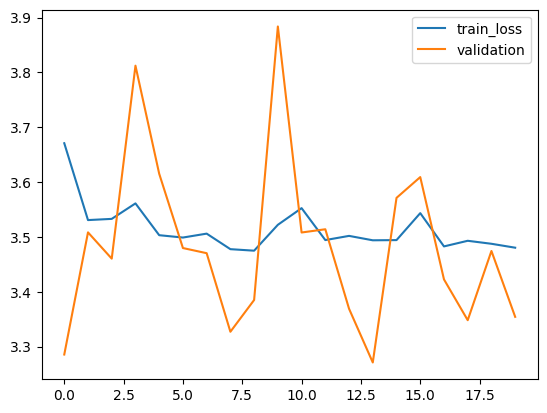

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'validation'], loc = 'upper right')
plt.show()

In [ ]:
X_test_p1 = scalar.fit_transform(X_test_p1)
y_pred = model.predict(X_test_p1)
y_pred = (y_pred > 0.5)

print(classification_report(y_test_p1,y_pred))

736/736 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13748
           1       0.99      0.96      0.98      9794

    accuracy                           0.98     23542
   macro avg       0.98      0.98      0.98     23542
weighted avg       0.98      0.98      0.98     23542

